In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Step 1: Load the data
file_path = "/content/drebin-215-dataset-5560malware-9476-benign.csv"
df = pd.read_csv(file_path, low_memory=False)

# Step 2: Preprocess the data

# Convert target labels to numeric values: 'S' to 1 (malware), 'B' to 0 (benign)
df['class'] = df['class'].map({'S': 1, 'B': 0})

# Drop columns with non-numeric values and replace missing values
# Convert non-numeric values to NaN
df.replace('?', np.nan, inplace=True)

# Convert all columns to numeric values, coerce errors will turn non-numeric values into NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Fill missing values (you can use other strategies depending on the context)
df.fillna(df.mean(), inplace=True)

# Separate features and labels
X = df.drop(columns=['class'])
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.9883643617021277
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1863
           1       0.99      0.98      0.98      1145

    accuracy                           0.99      3008
   macro avg       0.99      0.99      0.99      3008
weighted avg       0.99      0.99      0.99      3008



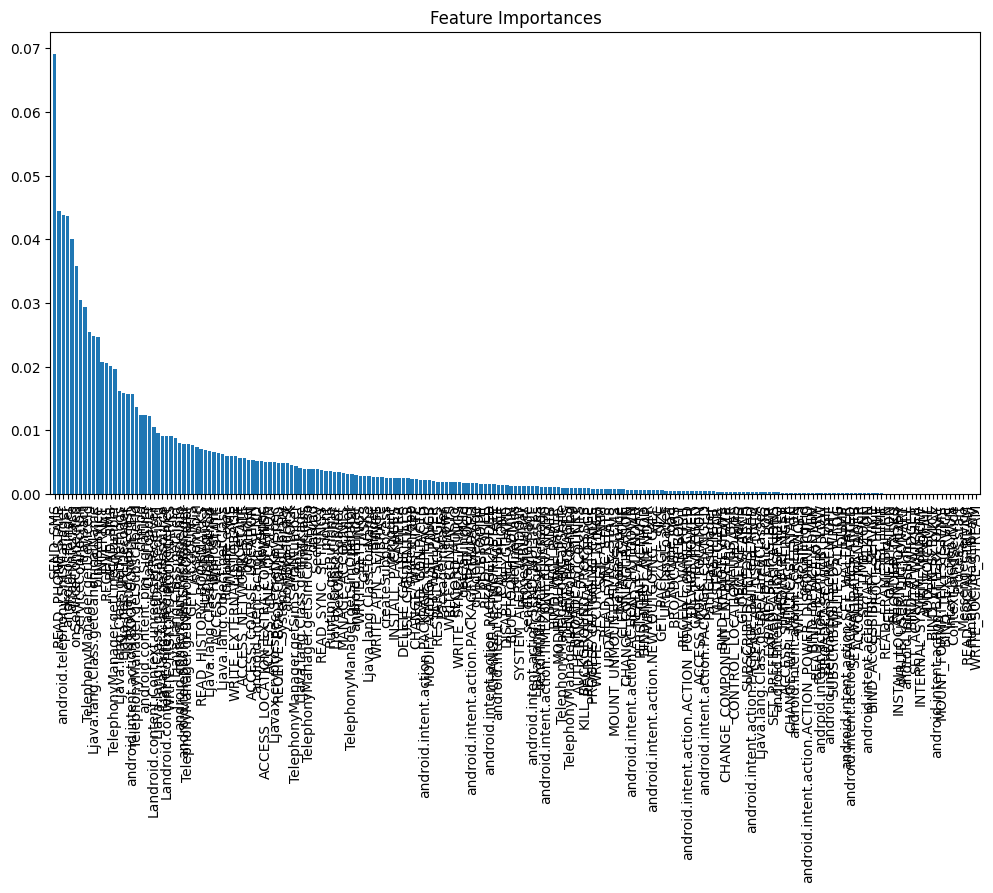

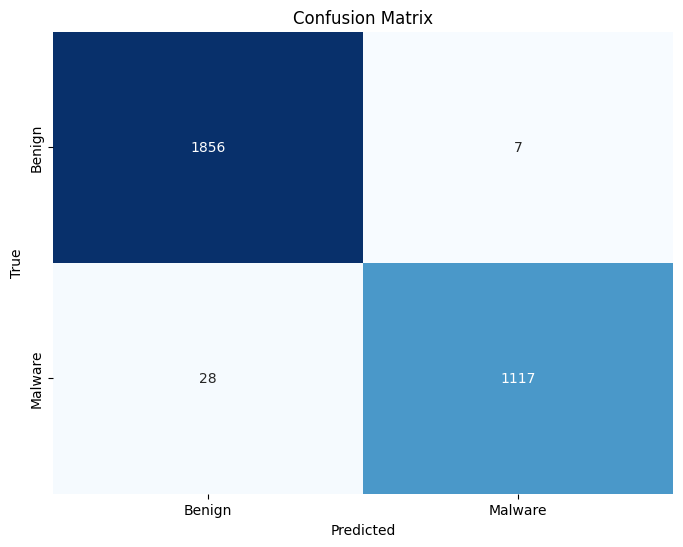

Sample 1: Benign
Sample 2: Benign
Sample 3: Benign
Sample 4: Malware
Sample 5: Benign


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd

# Visualize feature importances
def plot_feature_importances(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 6))
    plt.title("Feature Importances")
    plt.bar(range(X.shape[1]), importances[indices], align="center")
    plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Benign', 'Malware'], yticklabels=['Benign', 'Malware'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Plot feature importances
plot_feature_importances(clf, X.columns)

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred)

# Make predictions on new data
def predict_and_display(model, new_data):
    predictions = model.predict(new_data)
    for i, pred in enumerate(predictions):
        label = 'Malware' if pred == 1 else 'Benign'
        print(f"Sample {i + 1}: {label}")

# Example: Predict on a few samples from the test set
# Use the first 5 samples for demonstration purposes
sample_data = X_test.iloc[:5]
predict_and_display(clf, sample_data)


Model: Random Forest
Accuracy: 0.9883643617021277
Classification Report:
              precision    recall  f1-score      support
0              0.985138  0.996243  0.990659  1863.000000
1              0.993772  0.975546  0.984575  1145.000000
accuracy       0.988364  0.988364  0.988364     0.988364
macro avg      0.989455  0.985894  0.987617  3008.000000
weighted avg   0.988425  0.988364  0.988343  3008.000000


Model: SVM
Accuracy: 0.9773936170212766
Classification Report:
              precision    recall  f1-score      support
0              0.978157  0.985507  0.981818  1863.000000
1              0.976127  0.964192  0.970123  1145.000000
accuracy       0.977394  0.977394  0.977394     0.977394
macro avg      0.977142  0.974850  0.975971  3008.000000
weighted avg   0.977384  0.977394  0.977366  3008.000000


Model: Logistic Regression
Accuracy: 0.9744015957446809
Classification Report:
              precision    recall  f1-score      support
0              0.973489  0.985507  0.979

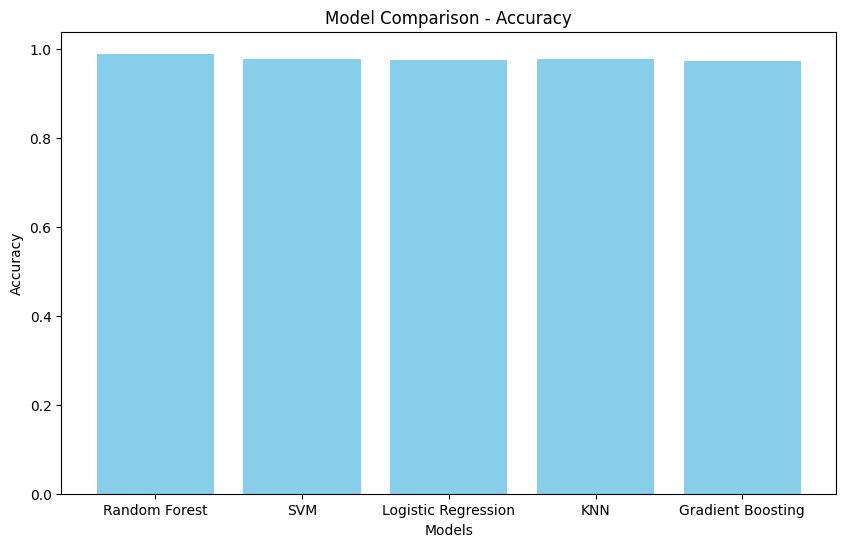

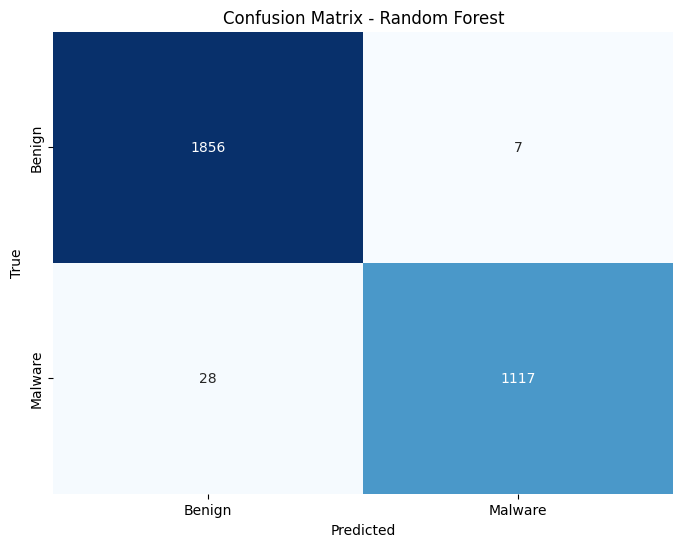

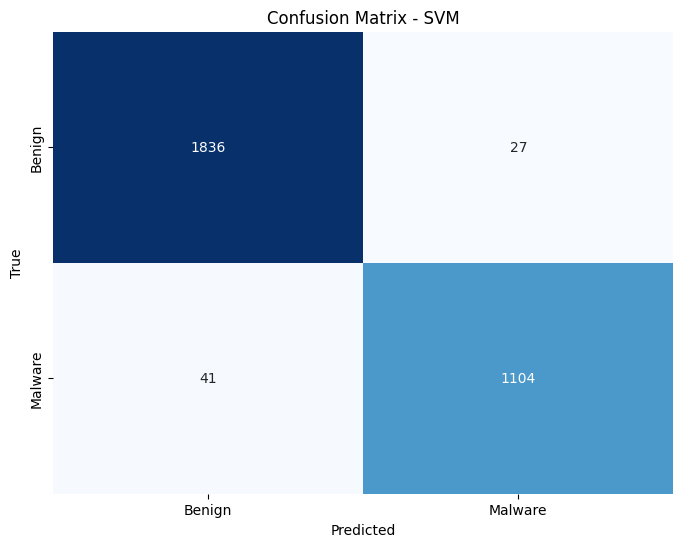

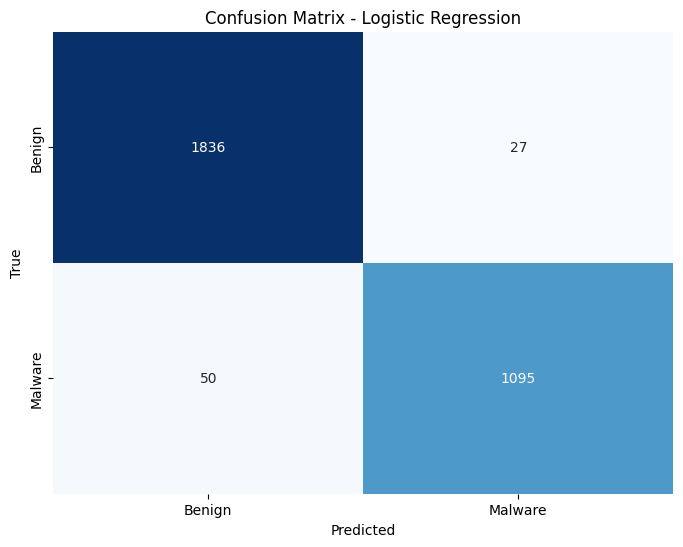

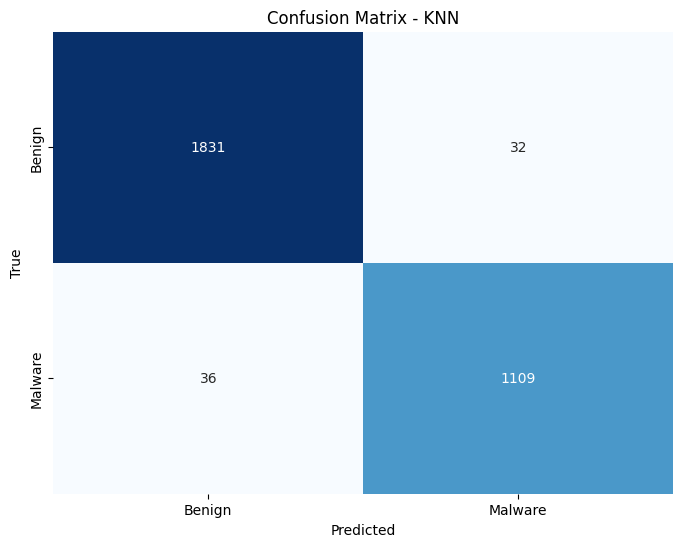

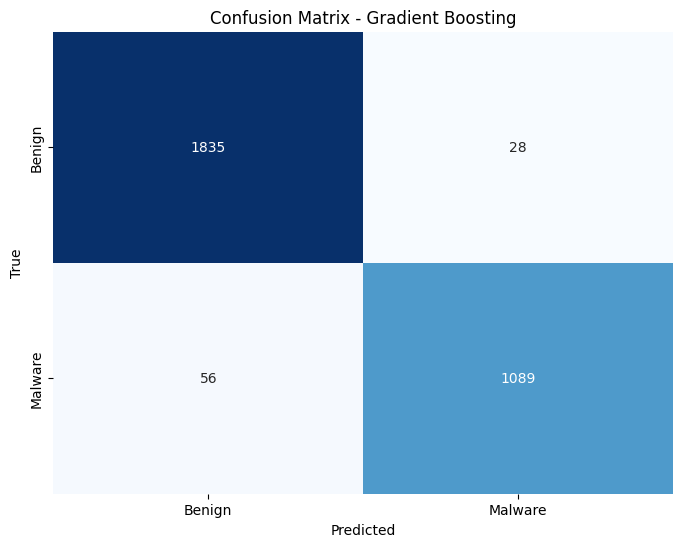

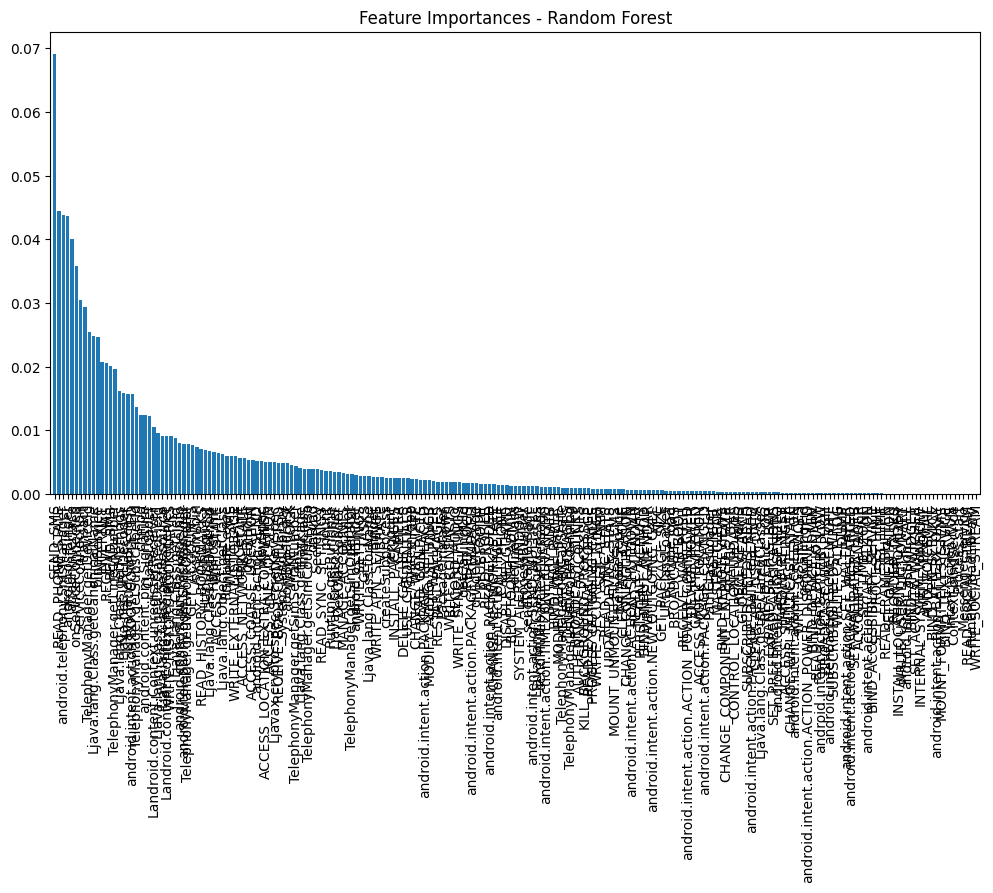

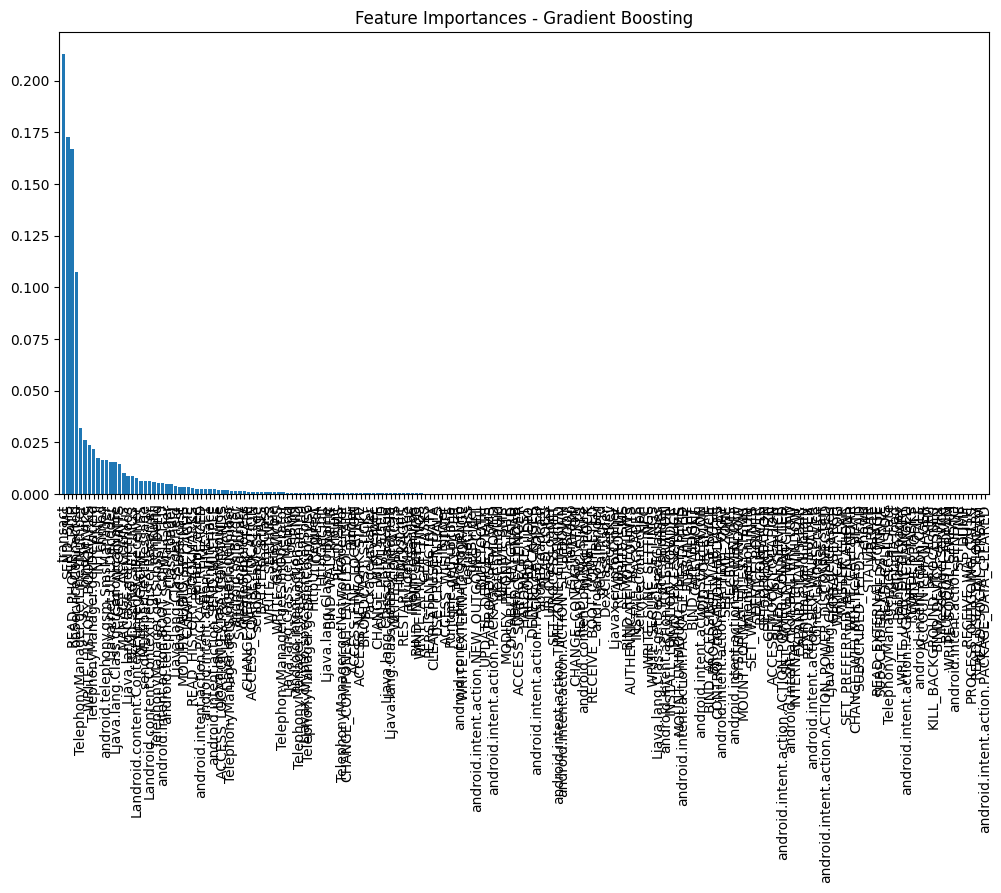

Sample 1: Benign
Sample 2: Benign
Sample 3: Benign
Sample 4: Malware
Sample 5: Benign


In [2]:
# -*- coding: utf-8 -*-
"""code.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1XORQBrUIwYX97CnjO0A-VceIrk7JcDMV
"""

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data
file_path = "/content/drebin-215-dataset-5560malware-9476-benign.csv"
df = pd.read_csv(file_path, low_memory=False)

# Step 2: Preprocess the data

# Convert target labels to numeric values: 'S' to 1 (malware), 'B' to 0 (benign)
df['class'] = df['class'].map({'S': 1, 'B': 0})

# Drop columns with non-numeric values and replace missing values
# Convert non-numeric values to NaN
df.replace('?', np.nan, inplace=True)

# Convert all columns to numeric values, coerce errors will turn non-numeric values into NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Fill missing values (you can use other strategies depending on the context)
df.fillna(df.mean(), inplace=True)

# Separate features and labels
X = df.drop(columns=['class'])
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary to store the models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Function to train and evaluate each model
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        results[model_name] = {
            "model": model,
            "accuracy": accuracy,
            "classification_report": report
        }
    return results

# Evaluate the models
results = evaluate_models(models, X_train, X_test, y_train, y_test)

# Print the results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Classification Report:\n{pd.DataFrame(result['classification_report']).transpose()}")
    print("\n")

# Visualize the results
accuracies = [result["accuracy"] for result in results.values()]
model_names = list(results.keys())

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.show()

# Plot confusion matrix for each model
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Benign', 'Malware'], yticklabels=['Benign', 'Malware'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Plot confusion matrix for each model
for model_name, result in results.items():
    plot_confusion_matrix(y_test, result["model"].predict(X_test), model_name)

# Visualize feature importances for tree-based models
def plot_feature_importances(model, feature_names, model_name):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(12, 6))
        plt.title(f"Feature Importances - {model_name}")
        plt.bar(range(X.shape[1]), importances[indices], align="center")
        plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
        plt.xlim([-1, X.shape[1]])
        plt.show()

# Plot feature importances for Random Forest and Gradient Boosting
plot_feature_importances(results["Random Forest"]["model"], X.columns, "Random Forest")
plot_feature_importances(results["Gradient Boosting"]["model"], X.columns, "Gradient Boosting")

# Make predictions on new data
def predict_and_display(model, new_data):
    predictions = model.predict(new_data)
    for i, pred in enumerate(predictions):
        label = 'Malware' if pred == 1 else 'Benign'
        print(f"Sample {i + 1}: {label}")

# Example: Predict on a few samples from the test set
# Use the first 5 samples for demonstration purposes
sample_data = X_test.iloc[:5]
predict_and_display(results["Random Forest"]["model"], sample_data)
